In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [3]:
data=pd.read_excel('Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<Axes: >

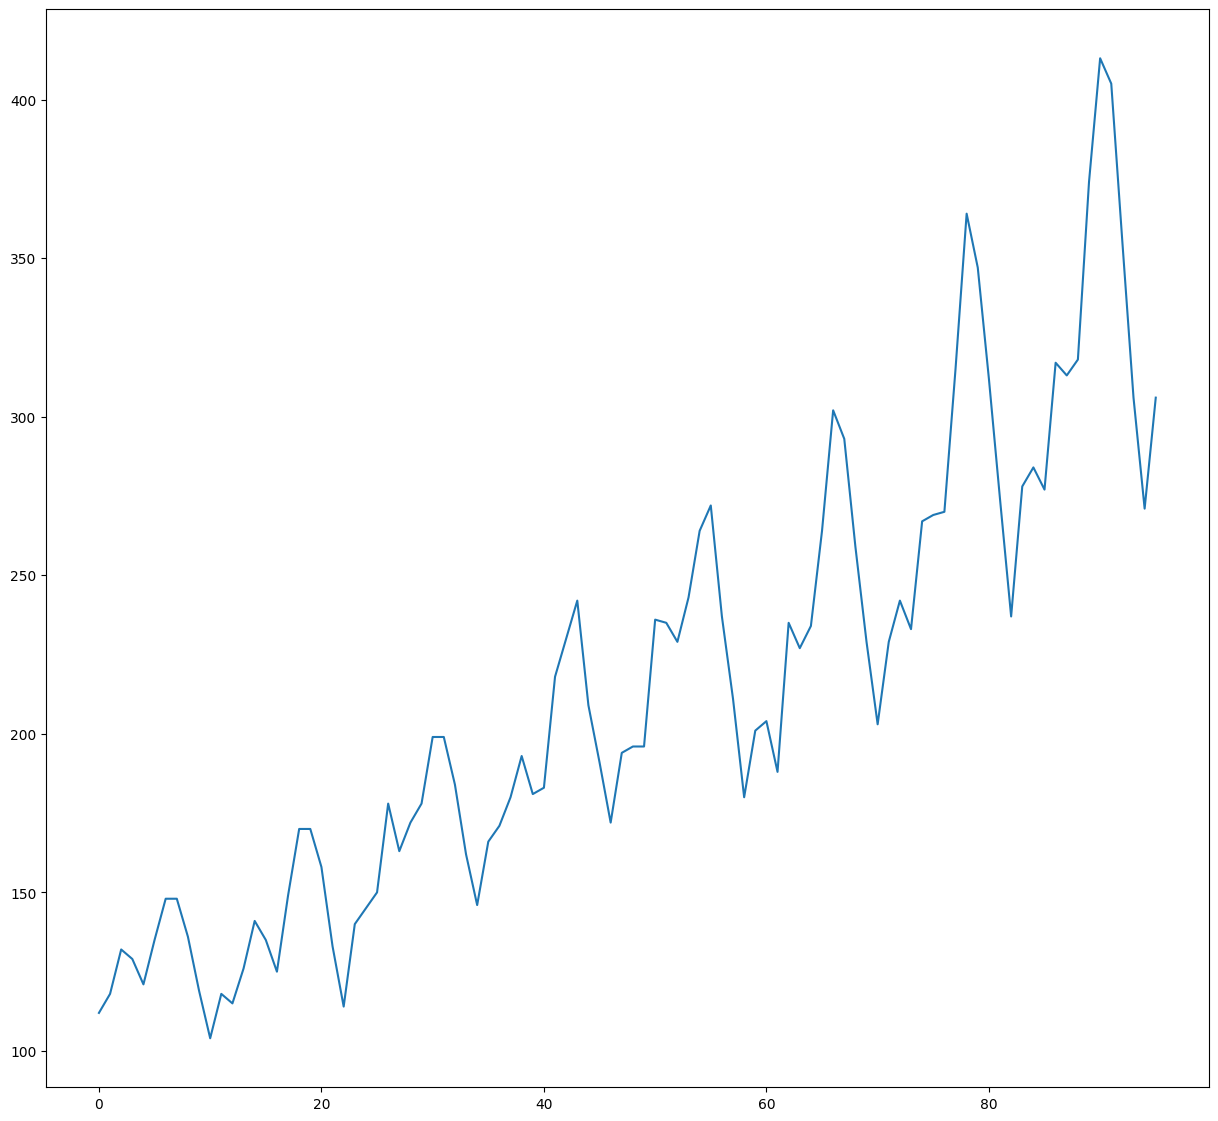

In [6]:
data['Passengers'].plot(figsize=(15,14))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
data.rename({'Month':'Date'},axis=1,inplace=True)

In [9]:
data

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [10]:
data1=data.copy()
data1.set_index('Date',inplace=True)

In [11]:
data['Date']=pd.to_datetime(data.Date,format='%b-%y')
data['month']=data.Date.dt.strftime('%b')
data['year']=data.Date.dt.strftime('%Y')

In [12]:
data

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,14))
heatmap_y=pd.pivot_table(data=data,values='Passengers',index='year',columns='month',aggfunc='mean',fill_value=0)
heatmap_y

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<Figure size 1400x1400 with 0 Axes>

<Axes: xlabel='month', ylabel='year'>

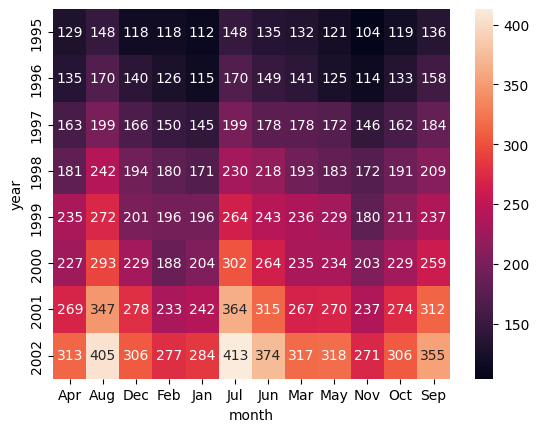

In [14]:
sns.heatmap(heatmap_y,annot=True,fmt='g')

<Axes: xlabel='year', ylabel='Passengers'>

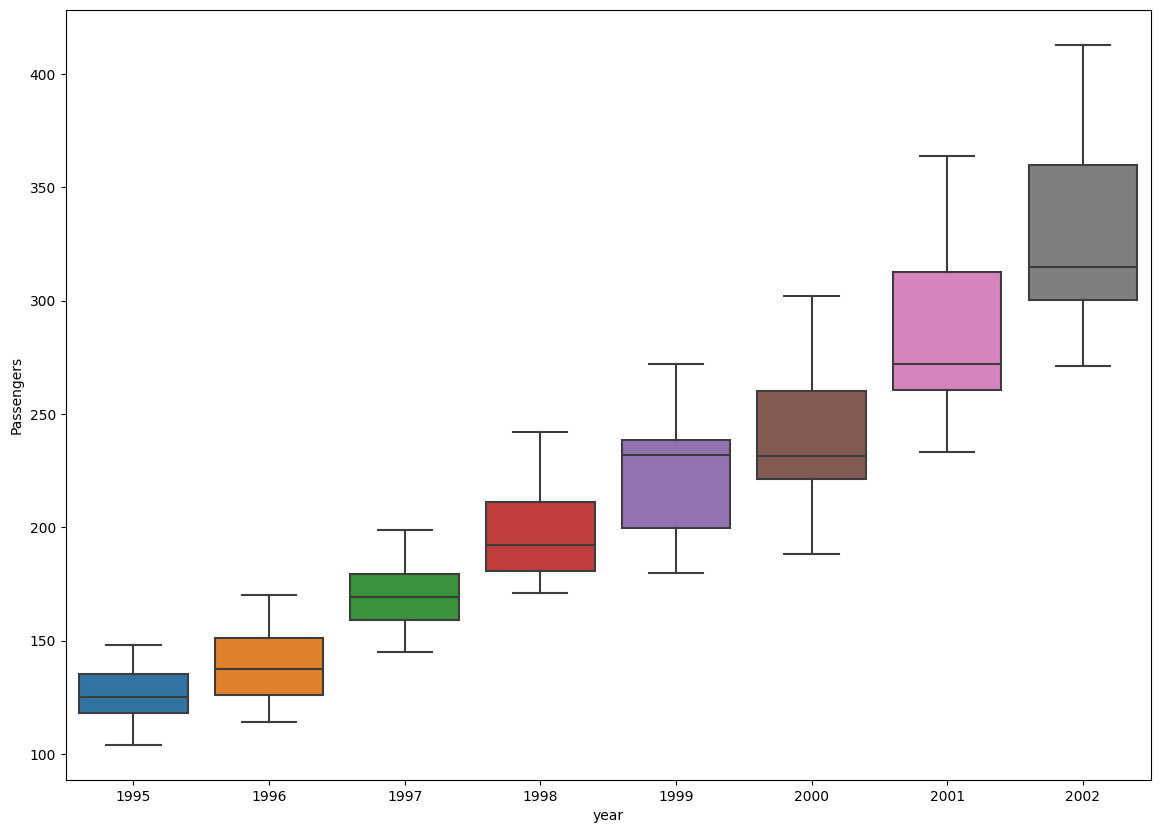

In [15]:
plt.figure(figsize=(14,10))
sns.boxplot(data,y='Passengers',x='year')

<Axes: xlabel='Date'>

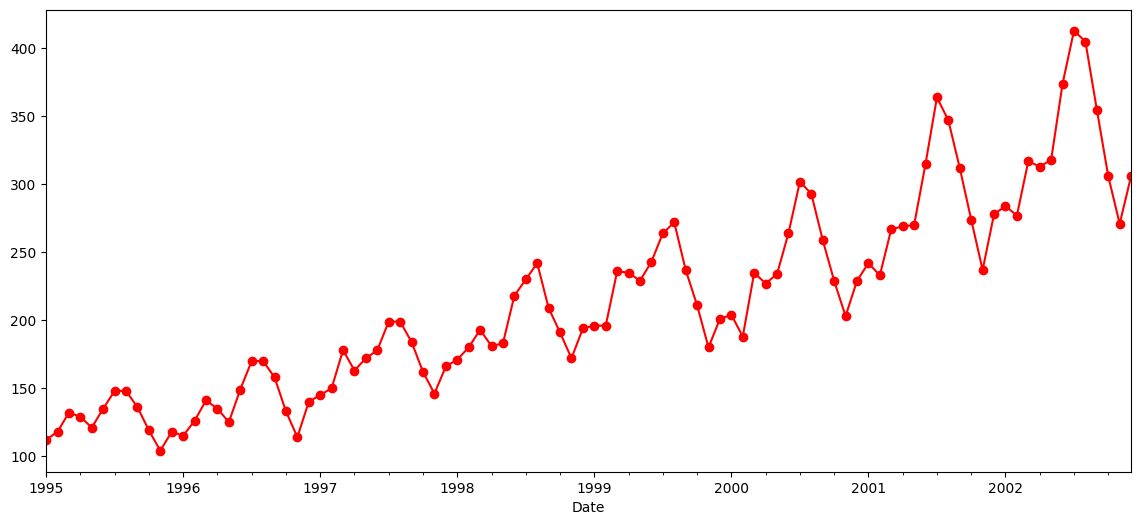

In [16]:
data1.Passengers.plot(figsize=[14,6],marker='o',color='red')

<Axes: xlabel='year', ylabel='Passengers'>

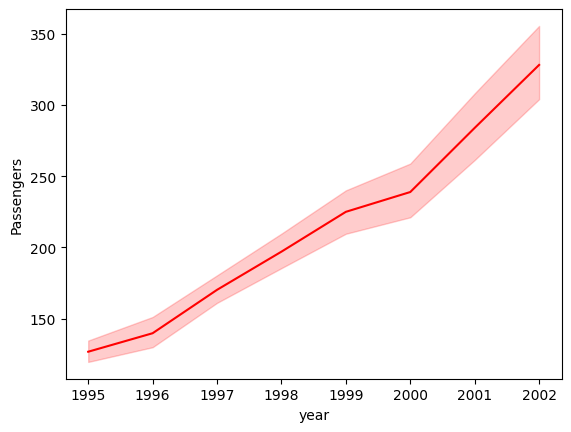

In [17]:
sns.lineplot(data,x='year',y='Passengers',color='red')

In [18]:
month_dummies=pd.DataFrame(pd.get_dummies(data['month']))
data1=pd.concat([data,month_dummies],axis=1)
data1.head()

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [19]:
data1['t']=np.arange(1,97)
data1['t_squared']=(data1['t'])**2
data1['log_Passenger']=np.log(data1['Passengers'])
data1.head()

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passenger
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [20]:
Train=data1.head(75)
Test=data1.head(25)

In [21]:
#linear_model
import statsmodels.formula.api as smf
linear_model=smf.ols('Passengers~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
print('rmse_linear :',rmse_linear)

rmse_linear : 17.31088558272981


In [22]:
#Exponential_model
exp_model=smf.ols('log_Passenger~t',data=Train).fit()
pred_exp=pd.Series(exp_model.predict(pd.DataFrame(Test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(Test['log_Passenger'])-np.array(pred_exp))**2))
print('rmse_exp :',rmse_exp)

rmse_exp : 0.1217294768111953


In [23]:
#additive_seasonality
add_sea= smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea=pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
print('rmse_add_sea:',rmse_add)

rmse_add_sea: 52.58698398229113


In [24]:
mul_sea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_model=pd.Series(mul_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_ms=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_model))**2))
print("rmse_mulsea :",rmse_ms)

rmse_mulsea : 52.58698398229113


In [25]:
data2=pd.DataFrame({'models':['linear','Exponential','Additive Seasonality','Multy Seasonality'],'Values':[rmse_linear,rmse_exp,rmse_add,rmse_ms]})

In [26]:
data2

,models,Values
0,linear,17.310886
1,Exponential,0.121729
2,Additive Seasonality,52.586984
3,Multy Seasonality,52.586984
